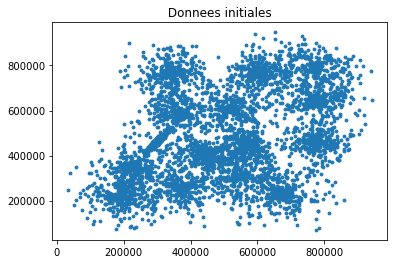

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  4 17:14:09 2023

@author: elkhamli
"""
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  4 16:21:25 2023

@author: elkhamli
"""
import numpy as np
import matplotlib . pyplot as plt
import time
from sklearn import cluster
from scipy . io import arff
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#
# Les donnees sont dans datanp ( 2 dimensions )
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#

path = './artificial/'
path1 = './dataset-rapport/'
#databrut = arff.loadarff ( open ( path + "target.arff" , 'r') )
databrut = np.loadtxt ( open ( path1 + "x3.txt") )
#datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in databrut [ 0 ] ]
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in databrut]

#print(datanp)
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]


f0 = [i[0] for i in datanp]

f1 = [i[1] for i in datanp]


plt . scatter ( f0 , f1 , s = 8 )
plt . title ( " Donnees initiales " )
plt . show ()





 Appel KMeans pour une valeur fixee de k 
Silhouetter Score:  0.4564118522270577


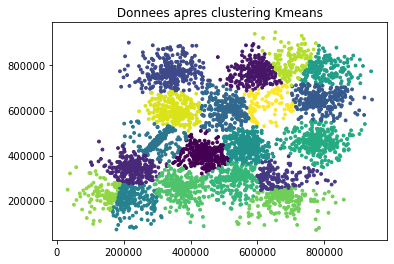

 nb clusters =  19  , nb iter =  14  , runtime =  500.3  ms 


In [18]:
print ( " Appel KMeans pour une valeur fixee de k " )
tps1 = time . time ()
k = 19
model = cluster.KMeans ( n_clusters =k , init = 'k-means++')
model.fit ( datanp )
tps2 = time.time ()
labels = model.labels_
iteration = model.n_iter_

# Calculate Silhoutte Score
score = silhouette_score(datanp, labels)

# Print the score
print('Silhouetter Score: ' ,score)
plt . scatter ( f0 , f1 , c=labels , s = 8 )
plt . title ( " Donnees apres clustering Kmeans " )
plt . show ()
print ( " nb clusters = " ,k , " , nb iter = " , iteration , " , runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )



 Dendrogramme ’single’ donnees initiales 


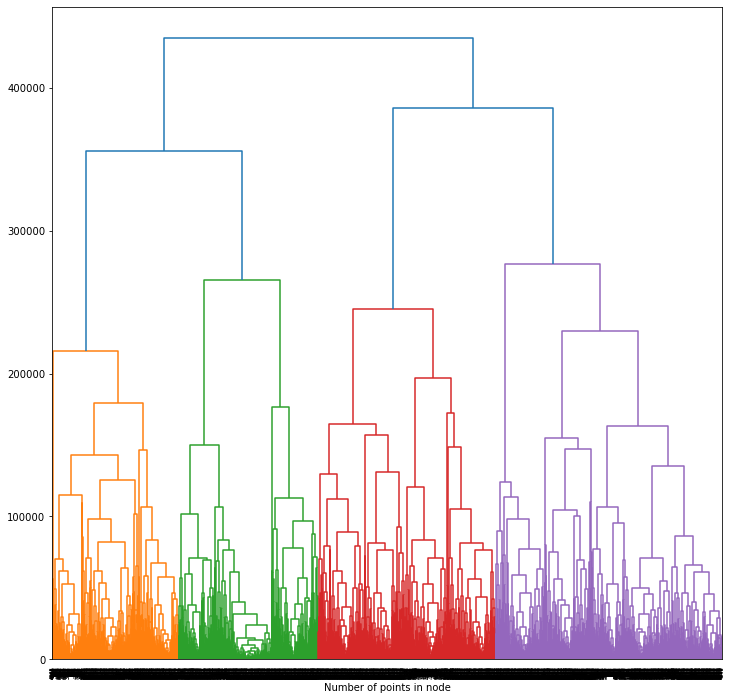

,Silhouetter Score:  0.18822914661566487  , runtime =  6719.73  ms 


In [66]:
# Donnees dans datanp
tps1 = time . time ()
print ( " Dendrogramme ’single’ donnees initiales " )
linked_mat = shc . linkage ( datanp , 'average')
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = 'top' , distance_sort = 'descending' , show_leaf_counts = True )
#ks = model . n_clusters_
tps2 = time.time ()
plt.xlabel("Number of points in node")
plt . show ()
score = silhouette_score(datanp, labels)
#print(" nb clusters = " ,ks,',Silhouetter Score: ' ,score," , runtime = ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )
print(',Silhouetter Score: ' ,score," , runtime = ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

Silhouetter Score:  0.18822914661566487


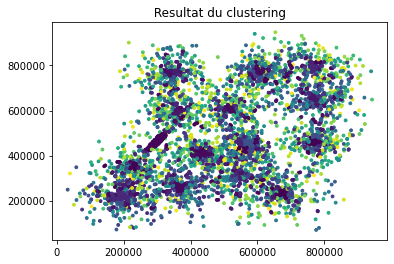

 nb clusters =  2423  , nb feuilles =  5000  runtime =  223.87  ms 


In [22]:
# set di stance_threshold ( 0 ensures we compute the full tree )


tps1 = time.time ()
model = cluster.AgglomerativeClustering ( distance_threshold = 5000, linkage = 'single',
                                         n_clusters = None, compute_full_tree = True )
model = model.fit ( datanp )
tps2 = time.time ()
labels = model . labels_
ks = model . n_clusters_
leaves = model . n_leaves_
# Calculate Silhoutte Score
score = silhouette_score(datanp, labels )

# Print the score
print('Silhouetter Score: ' ,score)
# Affichage clustering

plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering " )
plt . show ()
print ( " nb clusters = " ,ks, " , nb feuilles = " , leaves ," runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

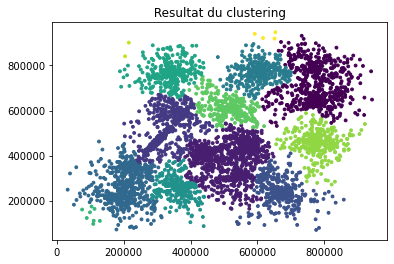

Silhouetter Score:  0.38122784632283685
distance 170000 , nb clusters =  13  , nb feuilles =  5000  runtime =  1479.0  ms 


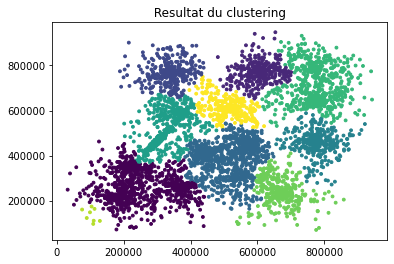

Silhouetter Score:  0.38616374709367823
distance 180000 , nb clusters =  10  , nb feuilles =  5000  runtime =  2163.0  ms 


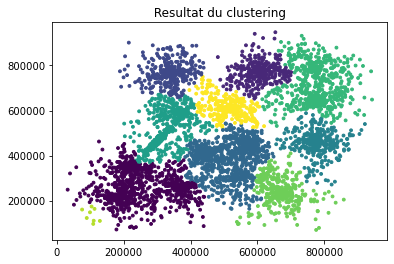

Silhouetter Score:  0.38616374709367823
distance 190000 , nb clusters =  10  , nb feuilles =  5000  runtime =  1253.0  ms 


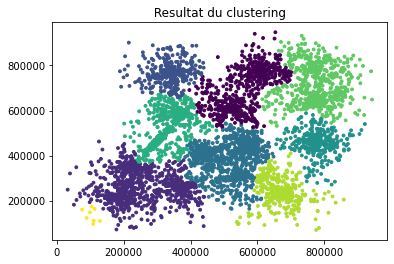

Silhouetter Score:  0.3825545639910222
distance 200000 , nb clusters =  9  , nb feuilles =  5000  runtime =  1241.0  ms 


In [73]:
def auto_cluster(distances):
    diss=distances
    # set the number of clusters
    for i in range(0,len(diss)):
        dis = diss[i]
        tps1 = time . time ()
        model = cluster.AgglomerativeClustering ( distance_threshold = dis, linkage = 'average',
                                         n_clusters = None, compute_full_tree = True )
        model = model . fit ( datanp )
        tps2 = time . time ()
        labels = model . labels_
        kres = model . n_clusters_
        leaves = model . n_leaves_
        # Affichage clustering
        plt . scatter ( f0 , f1 , c = labels , s = 8 )
        plt . title ( " Resultat du clustering " )
        plt . show()
        # Calculate Silhoutte Score
        score = silhouette_score(datanp, labels)

        # Print the score
        print('Silhouetter Score: ' ,score)
        print ( "distance",dis,", nb clusters = " ,kres, " , nb feuilles = " , leaves ," runtime = " , 
               round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )
        
auto_cluster([170000,180000,190000,200000])

In [ ]:
# Distances k plus proches voisins
# Donnees dans X
k=300
neigh = NearestNeighbors(n_neighbors = k)
neigh.fit(datanp)
distances,indices = neigh .kneighbors(datanp)
# retirer le point " origine "
newDistances = np . asarray ( [np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
trie = np . sort ( newDistances )
plt . title ( " Plus proches voisins  " )
plt . plot(trie) ;
plt . show ()



In [ ]:
def automation(epsl,samplesl):
    epss=epsl
    min_sampless = samplesl
    for i in range(0,len(epss)):
        epsn = epss[i]
        tps1 = time . time ()
        print(epsn)
        for j in range(0,len(min_sampless)): 
            min_samplesn = min_sampless[j]
            y_pred = DBSCAN(eps = epsn, min_samples = min_samplesn).fit_predict(datanp) 
            tps2 = time . time ()
            #y_pred = DBSCAN(eps = 0.2, min_samples = 5).fit_predict(datanp)
            # Calculate Silhoutte Score
            score = silhouette_score(datanp, y_pred)
            # Print the score
            print(min_samplesn,',Silhouetter Score: ' ,score, " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")
            plt.scatter(f0,f1,c = y_pred, s=8)
            plt . title ( "DBSCAN")
            plt.show()

            
            
            
           
automation([50000],[50,100,150,200,250,300])

In [ ]:

#DBSCAN
import random
n1 = random.randint(0,120000)
n2 = random.randint(0,500)
tps1 = time . time ()
y_pred = DBSCAN(eps = n1, min_samples = n2).fit_predict(datanp)
print(n1,n2)
tps2 = time . time ()
# Calculate Silhoutte Score
score = silhouette_score(datanp, y_pred)
# Print the score
print(',Silhouetter Score: ' ,score, " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms ")
plt.scatter(f0,f1,c = y_pred, s=8)
plt . title ( "DBSCAN")
plt.show()